Sample simulated data (first 5 rows):
        Z_d       Z_s         W       e_d       e_s    p_star    y_star
0  1.248357  1.699678 -0.675178 -0.572342 -0.259048 -0.713453  0.237892
1  0.930868  1.462317 -0.144519 -0.258116 -0.009361 -0.595920  0.468977
2  1.323844  1.029815 -0.792420 -0.124082  0.005405 -0.272069  0.332243
3  1.761515  0.676532 -0.307962  0.566306  0.141789  0.486591  0.643895
4  0.882923  1.349112 -1.893615  0.166966 -0.410058 -0.018347  0.067798


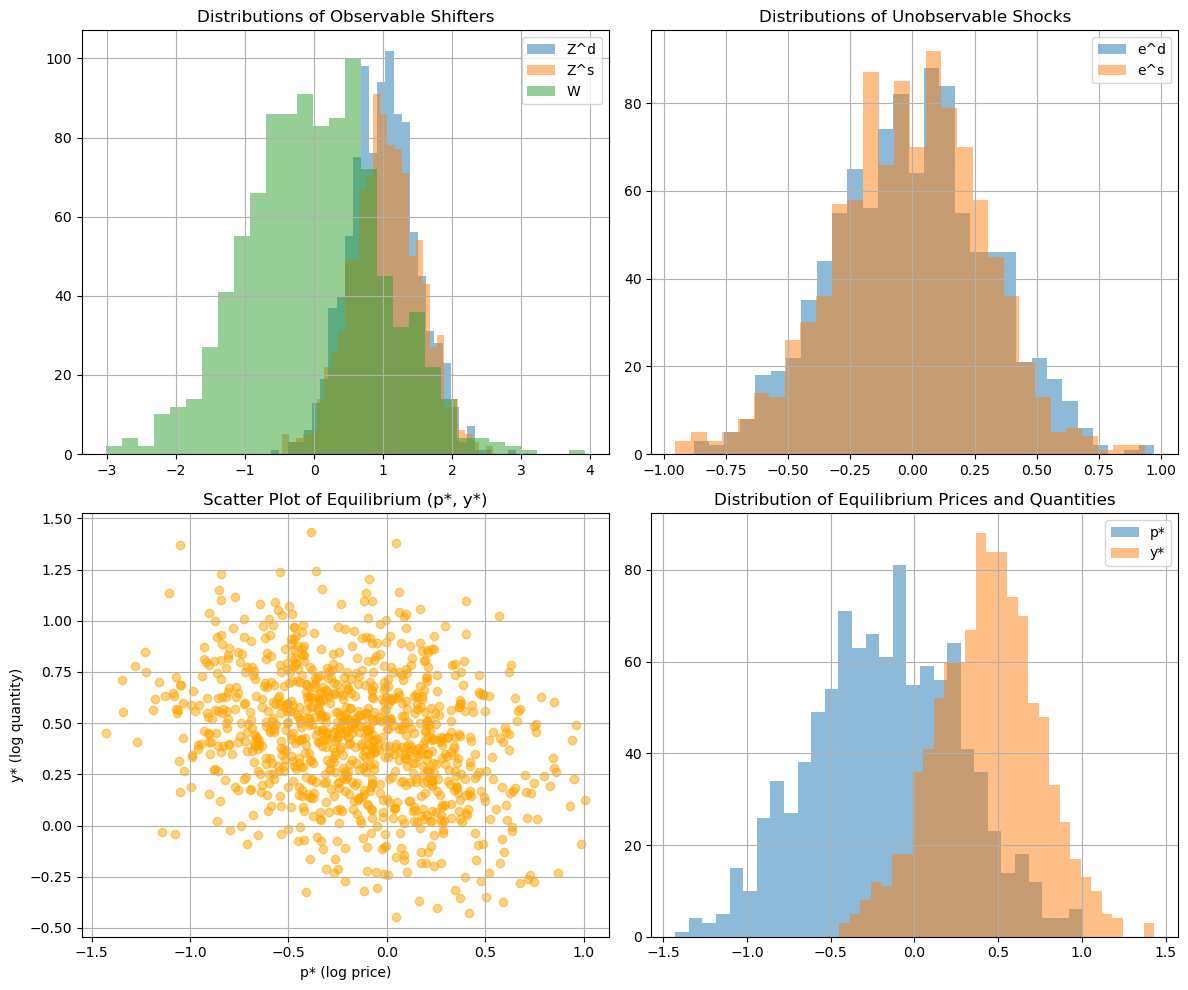

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Parameter Setup
# -------------------------------
np.random.seed(42)  # For reproducibility
N = 1000            # Number of simulated observations

# Structural parameters for demand (log form)
alpha_1 = -0.8   # coefficient on p in demand
alpha_2 =  0.3   # coefficient on Z^d
alpha_3 =  0.2   # coefficient on W

# Structural parameters for supply (log form)
beta_1  =  0.4   # coefficient on p in supply
beta_2  =  0.5   # coefficient on Z^s
beta_3  =  0.1   # coefficient on W

# -------------------------------
# 2. Generate Observable Shifters
# -------------------------------
Z_d = np.random.normal(loc=1.0, scale=0.5, size=N)  # Demand-specific shifter
Z_s = np.random.normal(loc=1.0, scale=0.5, size=N)  # Supply-specific shifter
W   = np.random.normal(loc=0.0, scale=1.0, size=N)  # Common shifter

# -------------------------------
# 3. Generate Unobservable Shocks
# -------------------------------
e_d = np.random.normal(loc=0.0, scale=0.3, size=N)  # Demand shock
e_s = np.random.normal(loc=0.0, scale=0.3, size=N)  # Supply shock

# -------------------------------
# 4. Solve for Equilibrium
# -------------------------------
# Equations (in logs):
# y^p = alpha_1 * p + alpha_2 * Z^d + alpha_3 * W + e_d    (Demand)
# y^s = beta_1  * p + beta_2  * Z^s + beta_3  * W + e_s    (Supply)
# Equilibrium condition: y^p = y^s => solve for p^*
# p^* = [ (beta_2 * Z_s - alpha_2 * Z_d) + (beta_3 - alpha_3)*W + (e_s - e_d ) ] / (alpha_1 - beta_1)

p_star = ((beta_2 * Z_s - alpha_2 * Z_d) 
          + (beta_3 - alpha_3) * W 
          + (e_s - e_d)) / (alpha_1 - beta_1)

# Then compute the equilibrium quantity (in logs), y^*:
# y^* = alpha_1 * p^* + alpha_2 * Z^d + alpha_3 * W + e_d   (using the demand equation)
y_star = alpha_1 * p_star + alpha_2 * Z_d + alpha_3 * W + e_d

# -------------------------------
# 5. Organize Data in a DataFrame
# -------------------------------
df = pd.DataFrame({
    'Z_d': Z_d,
    'Z_s': Z_s,
    'W': W,
    'e_d': e_d,
    'e_s': e_s,
    'p_star': p_star,
    'y_star': y_star
})

print("Sample simulated data (first 5 rows):")
print(df.head())

# -------------------------------
# 6. Visualization
# -------------------------------
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# (A) Histogram of the shifters
axs[0, 0].hist(Z_d, bins=30, alpha=0.5, label='Z^d')
axs[0, 0].hist(Z_s, bins=30, alpha=0.5, label='Z^s')
axs[0, 0].hist(W,   bins=30, alpha=0.5, label='W')
axs[0, 0].set_title("Distributions of Observable Shifters")
axs[0, 0].legend()
axs[0, 0].grid(True)

# (B) Histogram of the shocks
axs[0, 1].hist(e_d, bins=30, alpha=0.5, label='e^d')
axs[0, 1].hist(e_s, bins=30, alpha=0.5, label='e^s')
axs[0, 1].set_title("Distributions of Unobservable Shocks")
axs[0, 1].legend()
axs[0, 1].grid(True)

# (C) Scatter plot of p* vs. y*
axs[1, 0].scatter(p_star, y_star, alpha=0.5, color='orange')
axs[1, 0].set_title("Scatter Plot of Equilibrium (p*, y*)")
axs[1, 0].set_xlabel("p* (log price)")
axs[1, 0].set_ylabel("y* (log quantity)")
axs[1, 0].grid(True)

# (D) Histograms of p* and y*
axs[1, 1].hist(p_star, bins=30, alpha=0.5, label='p*')
axs[1, 1].hist(y_star, bins=30, alpha=0.5, label='y*')
axs[1, 1].set_title("Distribution of Equilibrium Prices and Quantities")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
